Download the data set

1) the dataset is available at http://yann.lecun.com/exdb/mnist/
---
2) the dataset is divided into two parts one is for training and testing.
---
3) file name with train-* is all for training; it includes the label as well.
---
4) file name with t10k-* is all for testing;

In [5]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
# teh following links are of the test data set
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz


--2020-10-13 09:51:30--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.28.7.204, 104.28.6.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  4.87MB/s    in 1.9s    

2020-10-13 09:51:33 (4.87 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2020-10-13 09:51:33--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.28.7.204, 104.28.6.204, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K   157

the following command will check the dataset downloaded or not from the website the following will be the output

drwxr-xr-x 1 root root    4096 Oct  5 16:31 sample_data/ <br>
-rw-r--r-- 1 root root 1648877 Jul 21  2000 t10k-images-idx3-ubyte.gz <br>
-rw-r--r-- 1 root root    4542 Jul 21  2000 t10k-labels-idx1-ubyte.gz <br>
-rw-r--r-- 1 root root 9912422 Jul 21  2000 train-images-idx3-ubyte.gz<br>
-rw-r--r-- 1 root root   28881 Jul 21  2000 train-labels-idx1-ubyte.gz<br>

In [6]:
ls -l

total 11340
drwxr-xr-x 1 root root    4096 Oct  5 16:31 sample_data/
-rw-r--r-- 1 root root 1648877 Jul 21  2000 t10k-images-idx3-ubyte.gz
-rw-r--r-- 1 root root    4542 Jul 21  2000 t10k-labels-idx1-ubyte.gz
-rw-r--r-- 1 root root 9912422 Jul 21  2000 train-images-idx3-ubyte.gz
-rw-r--r-- 1 root root   28881 Jul 21  2000 train-labels-idx1-ubyte.gz


The following function will load the dataset file and unzip it, and the data will return. <br>
with the help of gzip, it will unzip the file and fetch the value of type uint8

In [7]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

The required libraries are imported. 
NumPy for operation and matplotlib for plotting the graphs

In [8]:
import numpy as np
import matplotlib.pyplot as plt

The following code will load the data to a variable and check the shape of the data. the following output will be displayed.

X-Train set size (60000, 784) <br>
y-Test set size (10000, 784) <br>
X - Label set Size (60000,) <br>
y - Label set size (10000,) <br>

In [9]:
X_train, y_train = load_mnist("./",kind="train")
X_test, y_test = load_mnist("./",kind="t10k")
print("X-Train set size",np.shape(X_train))
print("y-Test set size", np.shape(X_test))

print("X - Label set Size", np.shape(y_train))
print("y - Label set size", np.shape(y_test))

X-Train set size (60000, 784)
y-Test set size (10000, 784)
X - Label set Size (60000,)
y - Label set size (10000,)


The visualize_data function is used to visualize the content from the dataset. 

<hr> the encode data function is used to encode the label value from 0 to 1
for example, if the label value is 0, it will make an array of [1, 0, 0, 0, ... N] where N is the number of classes. 


In [10]:
def visualize_data(img_array, label_array, no_to_view):
    fig, ax = plt.subplots(nrows=8, ncols=8, sharex=True, sharey=True)
    ax = ax.flatten()
    for i in range(64):
        img = img_array[label_array==no_to_view][i].reshape(28,28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    plt.show()
def encode_data(y, num_labels=10):
    one_hot = np.zeros((num_labels, y.shape[0]))
    for i, val in enumerate(y):
        one_hot[val,i] = 1.0
    return one_hot

the following with call the function to display the content of the dataset

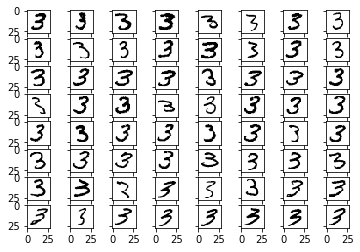

In [11]:
visualize_data(X_train, y_train, 3)

The following function will call the encode function to see what the encode function does. This is just an example.

In [12]:
y = np.array([4,5,6,7,9,0])
print(y)
z = encode_data(y)
print(z)

[4 5 6 7 9 0]
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


All the activation function and cost calculation function is defined over here. <hr>

Sigmoid function <br>

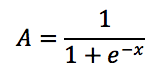 </br>
Cost Calc
<br>
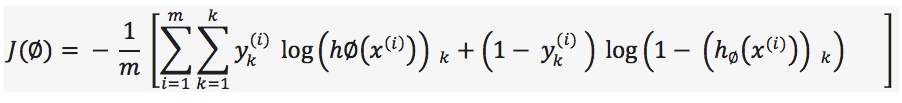

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def visualize_sigmoid():
    x = np.arange(-10, 10, 0.1)
    y = sigmoid(x)
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show()
    
def sigmoid_gradient(z):
    s = sigmoid(z)
    return s * (1 - s)

def calc_cost(y_enc, outpt):
    t1 = -y_enc * np.log(outpt)
    t2 = (1 - y_enc)*np.log(1-outpt)
    cost = np.sum(t1 - t2)
    return cost




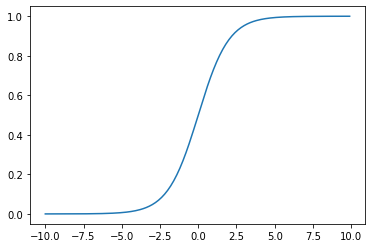

In [14]:
visualize_sigmoid()

In [15]:
def add_bias_unit(X, where):
    # where is just row or column
    if where == 'column':
        X_new = np.ones((X.shape[0], X.shape[1] + 1))
        X_new[:, 1:] = X
    elif where == 'row':
        X_new = np.ones((X.shape[0] + 1, X.shape[1]))
        X_new[1:, :] = X
    return X_new

As the weight size is 784 on the input layer, 75 on both the hidden layer and ten on the output layer <br>

Neural Network Architecture <br>
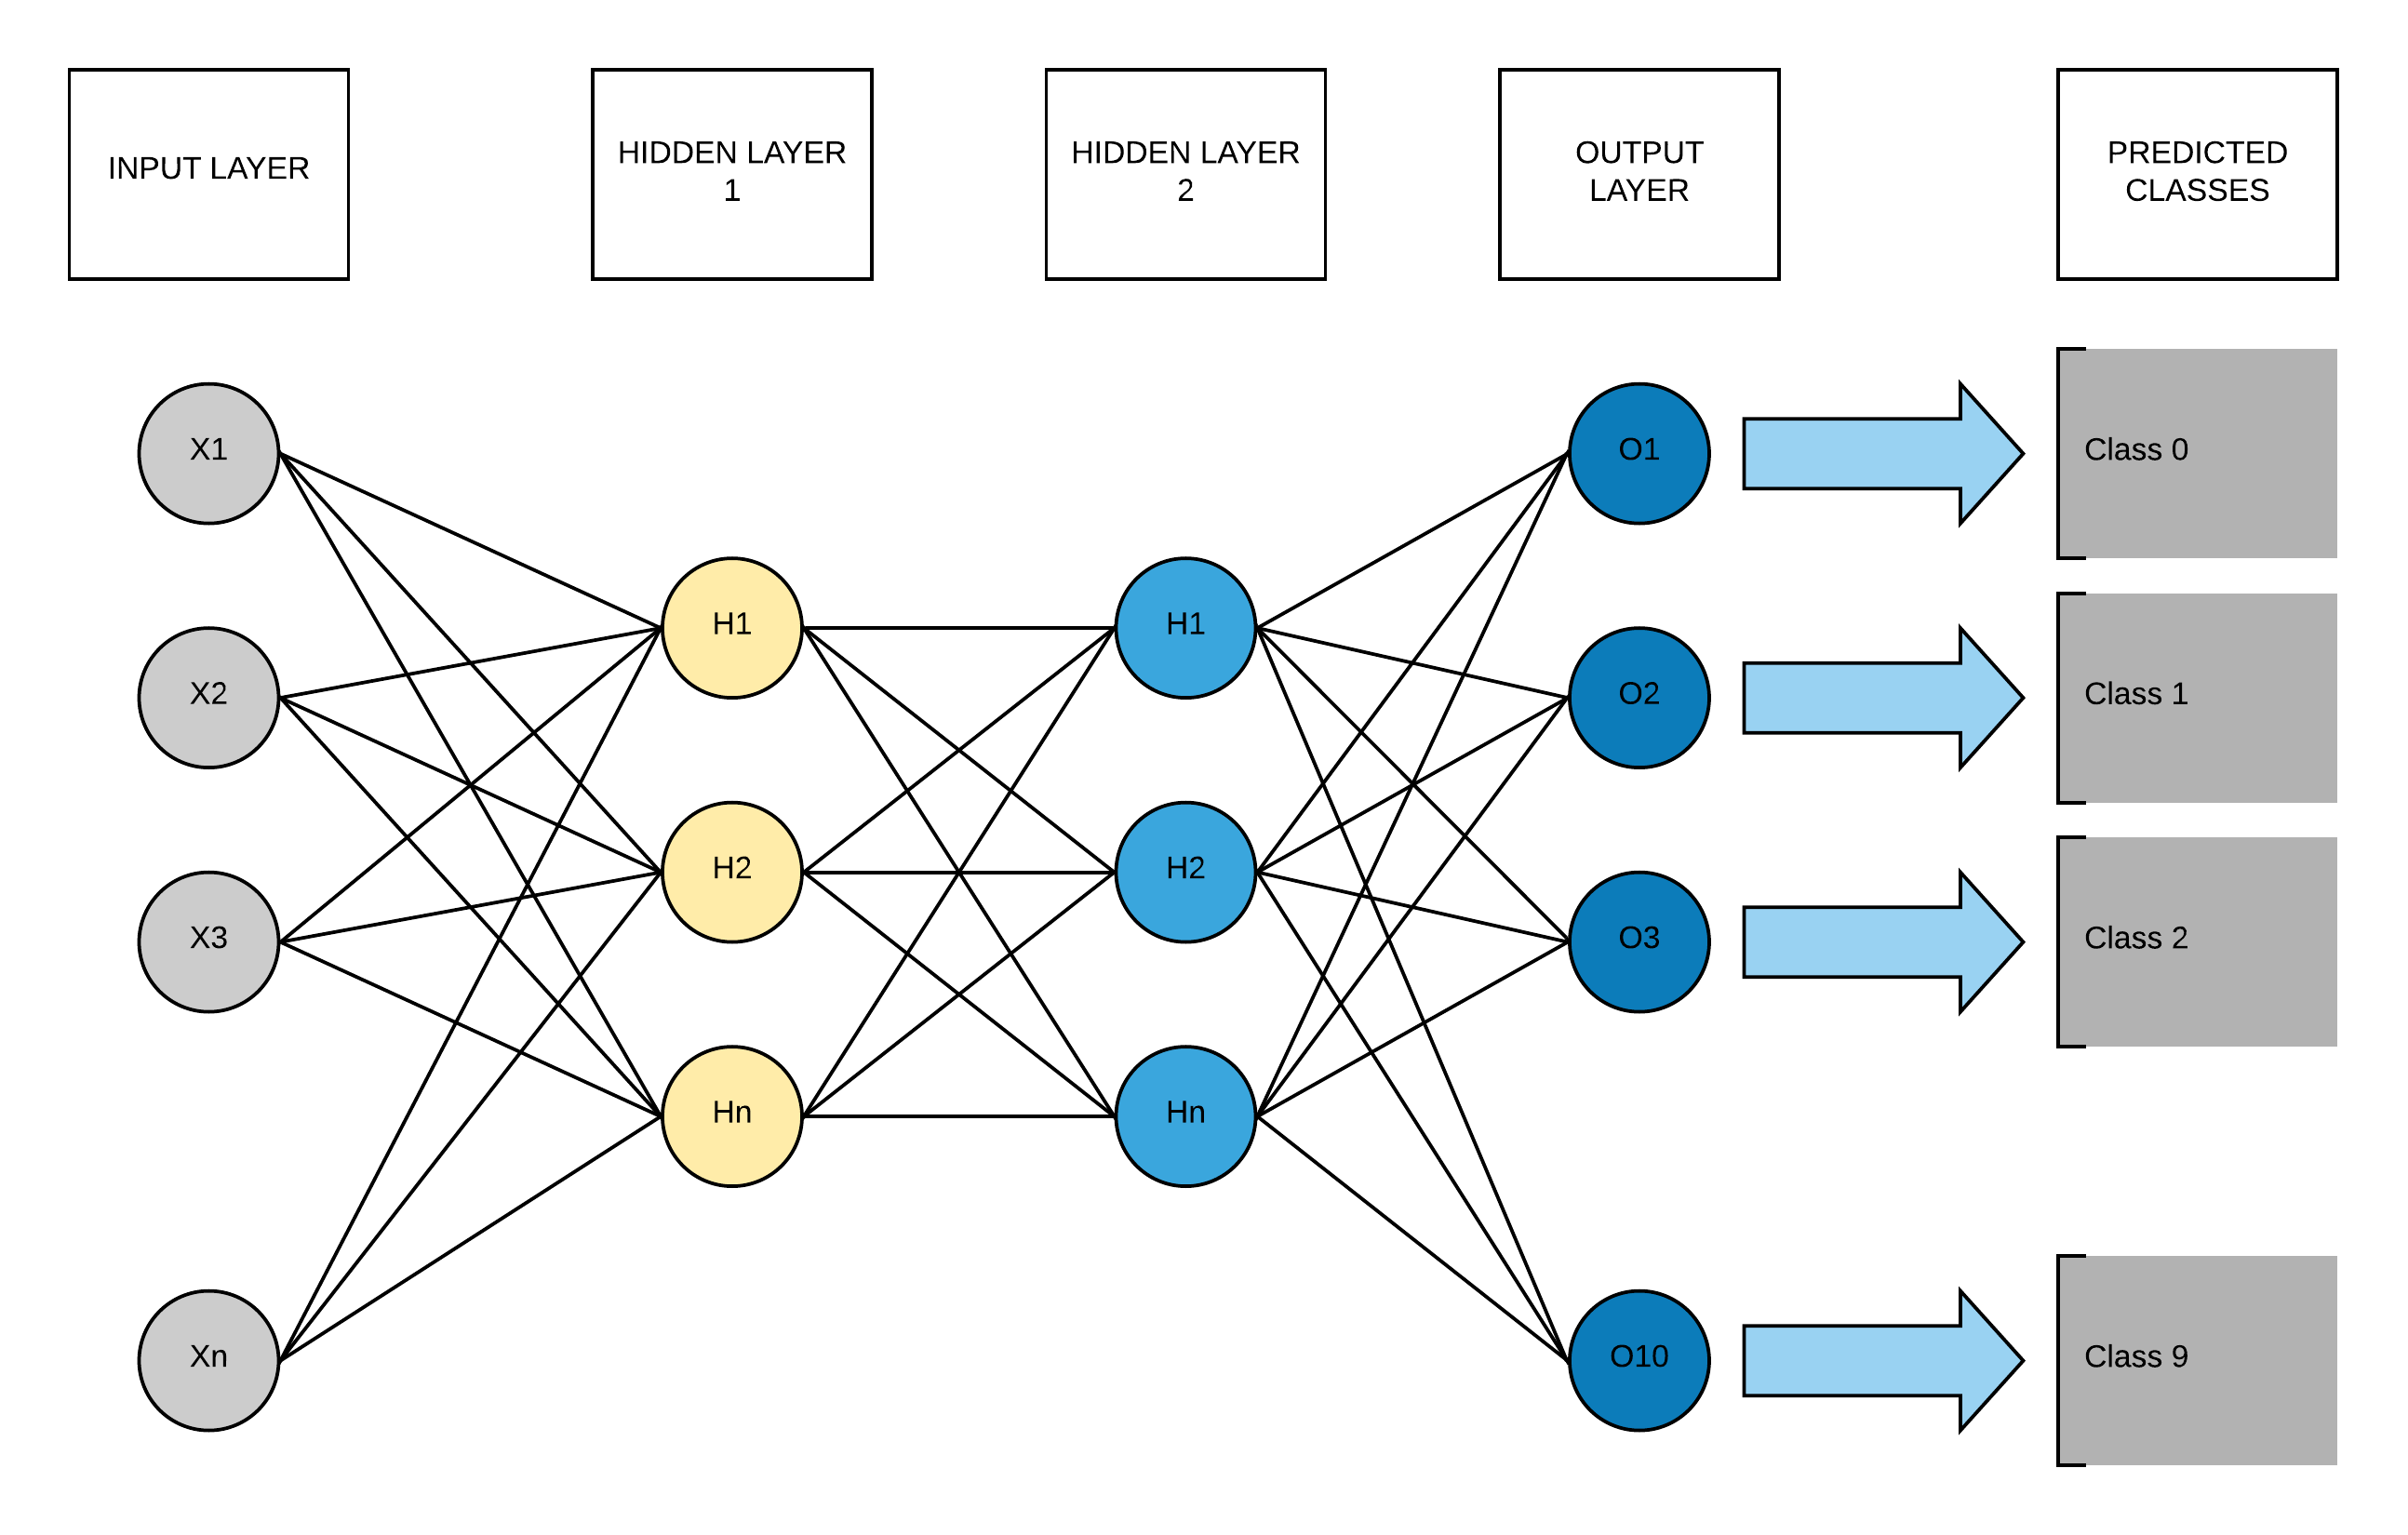


The feedforward function will provide the data to the next intermediate layer and so on. </br>
The predict function will predict the result with the help of np.argmax <br>
The calc_grad function will be called at the time of backpropagation in the neural network.<br>

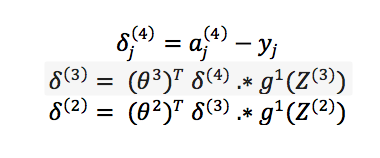

In [17]:
def init_weights(n_features, n_hidden, n_output):
    w1 = np.random.uniform(-1.0, 1.0, size=n_hidden*(n_features+1))
    w1 = w1.reshape(n_hidden, n_features+1)
    w2 = np.random.uniform(-1.0, 1.0, size=n_hidden*(n_hidden+1))
    w2 = w2.reshape(n_hidden, n_hidden+1)
    w3 = np.random.uniform(-1.0, 1.0, size=n_output*(n_hidden+1))
    w3 = w3.reshape(n_output, n_hidden+1)
    return w1, w2, w3

def feed_forward(x, w1, w2, w3):
    # add bias unit to the input
    # column within the row is just a byte of data
    # so we need to add a column vector of ones
    a1 = add_bias_unit(x, where='column')
    z2 = w1.dot(a1.T)
    a2 = sigmoid(z2)
    # since we transposed we have to add bias units as a row
    a2 = add_bias_unit(a2, where='row')
    z3 = w2.dot(a2)
    a3 = sigmoid(z3)
    a3 = add_bias_unit(a3, where='row')
    z4 = w3.dot(a3)
    a4 = sigmoid(z4)
    return a1, z2, a2, z3, a3, z4, a4

def predict(x, w1, w2, w3):
    a1, z2, a2, z3, a3, z4, a4 = feed_forward(x, w1, w2, w3)
    y_pred = np.argmax(a4, axis=0)
    return y_pred

def calc_grad(a1, a2, a3, a4, z2, z3, z4, y_enc, w1, w2, w3):
    delta4 = a4 - y_enc
    z3 = add_bias_unit(z3, where='row')
    delta3 = w3.T.dot(delta4)*sigmoid_gradient(z3)
    delta3 = delta3[1:, :]
    z2 = add_bias_unit(z2, where='row')
    delta2 = w2.T.dot(delta3)*sigmoid_gradient(z2)
    delta2 = delta2[1:,:]

    grad1 = delta2.dot(a1)
    grad2 = delta3.dot(a2.T)
    grad3 = delta4.dot(a3.T)

    return grad1, grad2, grad3



it will begin the training of the model, and the model will get the accuracy as followed <br>

final prediction accuracy is:  95.82

In [29]:
def runModel(X, y, X_t, y_t):
    X_copy, y_copy = X.copy(), y.copy()
    y_enc = encode_data(y)
    epochs = 500
    batch = 50

    w1, w2, w3 = init_weights(784, 75, 10)

    alpha = 0.001
    eta = 0.001
    dec = 0.00001
    delta_w1_prev = np.zeros(w1.shape)
    delta_w2_prev = np.zeros(w2.shape)
    delta_w3_prev = np.zeros(w3.shape)
    total_cost = []
    pred_acc = np.zeros(epochs)

    for i in range(epochs):

        shuffle = np.random.permutation(y_copy.shape[0])
        X_copy, y_enc = X_copy[shuffle], y_enc[:, shuffle]
        eta /= (1 + dec*i)

        mini = np.array_split(range(y_copy.shape[0]), batch)

        for step in mini:
            # feed forward the model
            a1, z2, a2, z3, a3, z4, a4 = feed_forward(X_copy[step], w1, w2, w3)
            cost = calc_cost(y_enc[:,step], a4)

            total_cost.append(cost)
            # back propagate
            grad1, grad2, grad3 = calc_grad(a1, a2, a3, a4, z2, z3, z4, y_enc[:,step],
                                            w1, w2, w3)
            delta_w1, delta_w2, delta_w3 = eta * grad1, eta * grad2, eta * grad3

            w1 -= delta_w1 + alpha * delta_w1_prev
            w2 -= delta_w2 + alpha * delta_w2_prev
            w3 -= delta_w3 + alpha * delta_w3_prev

            delta_w1_prev, delta_w2_prev, delta_w3_prev = delta_w1, delta_w2, delta_w3_prev

        y_pred = predict(X_t, w1, w2, w3)
        pred_acc[i] = 100*np.sum(y_t == y_pred, axis=0) / X_t.shape[0]
        print('epoch #', i, "Accuracy is ", pred_acc[i])
    return total_cost, pred_acc, y_pred

In [30]:
cost, acc, y_pred = runModel(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


epoch # 0 Accuracy is  70.41
epoch # 1 Accuracy is  78.64
epoch # 2 Accuracy is  79.72
epoch # 3 Accuracy is  81.97
epoch # 4 Accuracy is  84.2
epoch # 5 Accuracy is  85.03
epoch # 6 Accuracy is  85.81
epoch # 7 Accuracy is  86.69
epoch # 8 Accuracy is  87.27
epoch # 9 Accuracy is  87.35
epoch # 10 Accuracy is  87.41
epoch # 11 Accuracy is  88.44
epoch # 12 Accuracy is  87.44
epoch # 13 Accuracy is  88.71
epoch # 14 Accuracy is  87.98
epoch # 15 Accuracy is  88.13
epoch # 16 Accuracy is  88.29
epoch # 17 Accuracy is  89.12
epoch # 18 Accuracy is  89.62
epoch # 19 Accuracy is  88.86
epoch # 20 Accuracy is  89.95
epoch # 21 Accuracy is  89.87
epoch # 22 Accuracy is  89.85
epoch # 23 Accuracy is  90.03
epoch # 24 Accuracy is  90.19
epoch # 25 Accuracy is  90.64
epoch # 26 Accuracy is  90.61
epoch # 27 Accuracy is  90.43
epoch # 28 Accuracy is  90.87
epoch # 29 Accuracy is  91.26
epoch # 30 Accuracy is  91.18
epoch # 31 Accuracy is  90.78
epoch # 32 Accuracy is  90.91
epoch # 33 Accuracy i

The following code will begin the Testing progress. 
It will only predict the correct output, as shown below. <br>
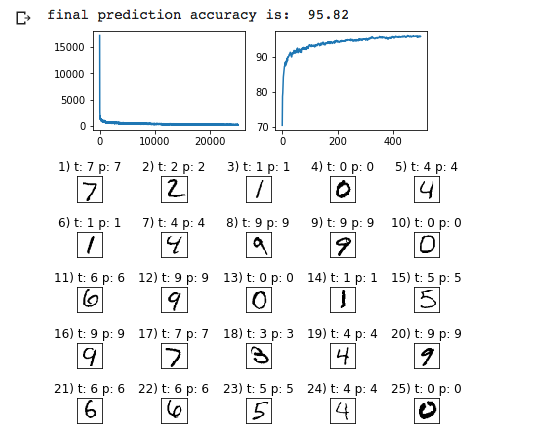

final prediction accuracy is:  95.82


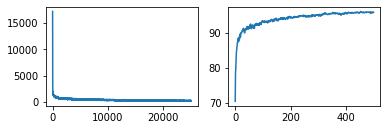

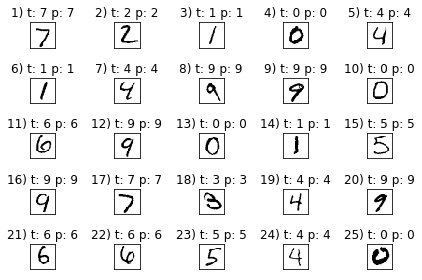

In [36]:
x_a = [i for i in range(acc.shape[0])]
x_c = [i for i in range(len(cost))]
print('final prediction accuracy is: ', acc[499])
plt.subplot(221)
plt.plot(x_c, cost)
plt.subplot(222)
plt.plot(x_a, acc)
plt.show()

correct_img = X_test[y_test == y_pred][:25]
correct_lab = y_test[y_test == y_pred][:25]
correct_lab = y_pred[y_test == y_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = correct_img[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i + 1, correct_lab[i], correct_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

The following code will show the wrong predicted output by the model <br>
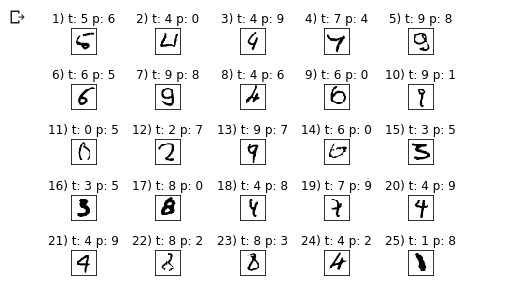

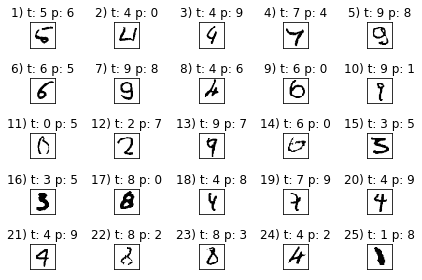

In [35]:
miscl_img = X_test[y_test != y_pred][:25]
correct_lab = y_test[y_test != y_pred][:25]
miscl_lab = y_pred[y_test != y_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i + 1, correct_lab[i], miscl_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()